In [273]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [229]:
import tensorflow as tf
import os
import numpy as np
import random

def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


def convert_stringArrays_to_floatArray(array):
    intArray = []

    for k in array:
        if isfloat(k):
            intArray.append(float(k))
    return intArray



def readFromFile(path):
    with open(path, 'r') as content_file:
        content = content_file.read()
        return content


def buil_db(array, value):
    data_X = []
    data_Y = []
    n = len(array)
    for i in range(0, n):
        data_X.append(array[i])
        data_Y.append(value)

    return data_X, data_Y


def buildSmallerTrainDataSameFalseandTrue(xTrain, y_train, size):
    X = []
    y = []
    seen = []
    while len(seen) < size / 2:
        rand = random.randrange(0,len(xTrain))
        if rand not in seen and y_train[rand] == 0:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
    seen = []      
    while len(seen) < size / 2:
        rand = random.randrange(0,len(xTrain))
        if rand not in seen and y_train[rand] == 1:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
    return np.array(X), np.array(y)

def buildSmallerTrainData(xTrain, y_train, size):
    X = []
    y = []
    seen = []
    while len(seen) < size :
        rand = random.randrange(0,len(xTrain))
        if rand not in seen:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
    return np.array(X), np.array(y)

def buildSmallerTestingData(xTrain, y_train, size, interval):
    X = []
    y = []
    seen = []
    rand = interval
    while len(seen) < size / 2:
        if rand not in seen and y_train[rand] == 0:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
        rand += 1
            
    rand = interval
    seen = []      
    while len(seen) < size / 2:
        if rand not in seen and y_train[rand] == 1:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
            
        rand += 1
    return np.array(X), np.array(y)


def readpktHistDirectFromFile(path):
    X_data = []
    files = os.listdir(path)
    for f in files:
        if os.path.isfile(path + f):
            hist = convert_stringArrays_to_floatArray(readFromFile(path + f).split(" "))
            X_data.append(np.array(hist))
  
    return X_data

def readDataset(value,path):
    x_train, y_train = [], []
    dataset = readpktHistDirectFromFile(path=path)
    data_x, data_y = buil_db(dataset, value)
    x_train.extend(data_x)
    y_train.extend(data_y)

    return x_train, y_train

def read_train_test():
    trainin_dataset_X = []
    trainin_dataset_y = []
    X_test=[]
    y_test=[]
   
    
    names = ['httpMultipleTab/4', 'httpMultipleTab/2', 'httpMultipleTab/3', 'httpMultipleTab/1',
        
             'noisyBitMultipleTab/4', 'noisyBitMultipleTab/2', 'noisyBitMultipleTab/3',
             'noisyBitMultipleTab/1','bitcoin']
    
    names = ['http/1', 'http/2', 'http/3', 'http/4', 'http/5',
              'bitcoin_noisy/1', 'bitcoin_noisy/2', 'bitcoin_noisy/3',
             'bitcoin_noisy/4', 'bitcoin_noisy/5', 'bitcoin']

    trueLablems = [1]
    labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
#     labels = [0, 1]
    i = 0#/home/fatemeh/jan 19-tor/vlm_0remove/10s/train/'  previous address. april 24
    address = '/home/fatemeh/MyProjects/Bitcoin_Traffic_Analysis/April-2020_2/tor/'
    for n in names:
        if 'bitcoin' in n:
            label = 1
        else:
            label = 0

        x_temp,y_temp = readDataset(path = address +  n + "/train/"
                                               ,value=label)
        trainin_dataset_X.extend(x_temp)
        trainin_dataset_y.extend(y_temp)

        x_temp2, y_temp2 = readDataset(path = address + n+ '/test/'  
                                              ,value=label )
        print("read data: ",n, len(x_temp), len(x_temp2))
       
        X_test.extend(x_temp2)
        y_test.extend(y_temp2)
        i += 1
    
 
    return (trainin_dataset_X,trainin_dataset_y), (X_test,y_test)


In [201]:
(x_train2, y_train2), (x_test2, y_test2) = read_train_test()
XTrainCopy2, yTrainCopy2 = np.array(x_train2), np.array(y_train2)
xTestCopy2, yTestCopy2 = np.array(x_test2), np.array(y_test2)

('read data: ', 'http/1', 10000, 2000)
('read data: ', 'http/2', 10000, 2000)
('read data: ', 'bitcoin_noisy/1', 10000, 2000)
('read data: ', 'bitcoin_noisy/2', 10000, 2000)
('read data: ', 'bitcoin', 5000, 2000)


In [9]:
(x_train, y_train), (x_test, y_test) = read_train_test()
XTrainCopy, yTrainCopy = np.array(x_train), np.array(y_train)
xTestCopy, yTestCopy = np.array(x_test), np.array(y_test) 


('read data: ', 'http/1', 10000, 2000)
('read data: ', 'http/2', 10000, 2000)
('read data: ', 'http/3', 10000, 2000)
('read data: ', 'http/4', 10000, 2000)
('read data: ', 'http/5', 10000, 2000)
('read data: ', 'bitcoin_noisy/1', 10000, 2000)
('read data: ', 'bitcoin_noisy/2', 10000, 2000)
('read data: ', 'bitcoin_noisy/3', 10000, 2000)
('read data: ', 'bitcoin_noisy/4', 10000, 2000)
('read data: ', 'bitcoin_noisy/5', 10000, 2000)
('read data: ', 'bitcoin', 5000, 2000)


In [234]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv1D, MaxPooling1D, LSTM,GlobalAveragePooling1D
from keras.layers.core import Activation
from keras.utils import plot_model

def get_NN_model(flow_size):
    
    model = Sequential()
    model.add(Conv1D(64, 1, activation='relu',input_shape=(1, flow_size)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    return model

def get_Dense_NN_model():
    model = Sequential()
    
    model.add(Flatten(input_shape=(1, 60)))
    
#     model.add(Dense(64, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    
    return model

def get_RR_NN_model():
    model = Sequential()    
    model.add(LSTM(256,input_shape=(1, 600)))

    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [233]:
n = 40000
epoch = 10

seed(1)
random.seed(1)
model = get_NN_model_2(flow_size = 1576)
for j in range(10):
    history = model.fit(XT[:n], yT[:n], epochs = 50, batch_size = 512, verbose = 0, validation_split = 0.3)
    y_pred = model.predict(XT[-10000:])
    FP, TP, accur = compute_performace(y_true = yT[-10000:], y_pred = y_pred)
    print('epochs: ', j, "n_train: ", n, FP, TP, accur)
  

('epochs: ', 0, 'n_train: ', 40000, 0.0016924053310767928, 0.9918452493836526, 0.9949)
('epochs: ', 1, 'n_train: ', 40000, 0.006558070657922572, 0.9939313483785321, 0.9937)
('epochs: ', 2, 'n_train: ', 40000, 0.0050772159932303785, 0.9935520576521905, 0.9942)


KeyboardInterrupt: 

In [177]:
y_pred = model.predict(XT[-n:])
FP, TP, accur = compute_performace(y_true = yT[-n:], y_pred = y_pred)
print('epochs: ', j, "n_train: ", n, FP, TP, accur)

('epochs: ', 1, 'n_train: ', 20000, 0.006151235549899247, 0.994513291079368, 0.9942)


In [91]:
scaler = MinMaxScaler(feature_range = (0, 1))
def shuffle_transform(X, y):
    
    order = np.arange(X.shape[0])
    np.random.shuffle(order)

    XT = X[order]
    yT = y[order]

    XT = scaler.fit_transform(XT)## train
    XT = np.expand_dims(XT, axis = 1)
    return XT, yT

In [187]:
XX = list(XTrainCopy)
YY = list(yTrainCopy)
XX.extend(list(xTestCopy))
YY.extend(list(yTestCopy))


In [189]:
XX2, YY2 = shuffle_transform(np.array(XX), np.array(YY))


In [92]:
XT, yT = shuffle_transform(XTrainCopy, yTrainCopy)
xt, yt = shuffle_transform(xTestCopy, yTestCopy)

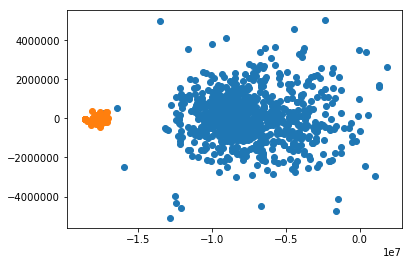

In [182]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca = pca.fit_transform(XTrainCopy)

x = pca[:, 0]
y = pca[:, 1]

t = 800
neg = 50000
plt.scatter(x[:t], y[:t])
plt.scatter(x[-t:], y[-t:])
# plt.plot(x,y)
plt.show()

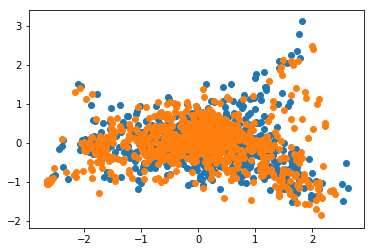

In [228]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca = pca.fit_transform(XX2.squeeze())

x = pca[:, 0]
y = pca[:, 1]

t = 800
neg = 50000
plt.scatter(x[:t], y[:t])
plt.scatter(x[-t:], y[-t:])
# plt.plot(x,y)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import time
from keras.regularizers import l2

def write_to_json(model, number):
    model_json = model.to_json()
    with open("model_vlm_0remove_tor_" + str(number) + ".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model_vlm_0remove_tor_" + str(number) + ".h5")

print(len(XTrainCopy),len(xTestCopy))# 30
scaler = MinMaxScaler(feature_range = (0, 1))
xT, yT = buildSmallerTrainDataSameFalseandTrue(xTestCopy, yTestCopy, size = 10000)
xT = scaler.fit_transform(xT[:, :])
print(xT.shape)
xT = np.expand_dims(xT, axis=1)
sizes = [5000, 10000, 20000, 40000]#80000]#1000, 5000, 10000, 20000, 50000, 
for size in sizes:
    model = get_NN_model_2(1576)
        
    X, y = buildSmallerTrainDataSameFalseandTrue(XTrainCopy, yTrainCopy, size = size)
    print("finished reading dataset")

    X = scaler.fit_transform(X[:,:])
    X = np.expand_dims(X, axis=1)

    start = time.time()
    history = model.fit(X, y, epochs = 1000, batch_size=64, verbose=0)
    #write_to_json(model, number=size)
    end = time.time()
    print ("Time it takes to fit: ", end - start)
    #buildSmallerTestingData(xTrain=xTestCopy, y_train=yTestCopy, size=5000,interval=p*5000)#xTestCopy, yTestCopy#

    y_pred = model.predict(xT)

    accur = 0
    true_pos = 0
    false_pos = 0
    number_of_all_one = sum(yT)
    nZeros = len(yT) - number_of_all_one
    for v in range(len(y_pred)):
        if y_pred[v] >= 0.5 and yT[v] == 1:
             accur += 1
             true_pos += 1
        if y_pred[v] < 0.5 and yT[v] == 0:
             accur += 1

        if y_pred[v] >= 0.5 and yT[v] == 0:
            false_pos += 1


    accur /= float(len(y_pred))
    print( "number of epocs", 1000, "number of training:", size,"Accuracy: ", accur)
    print(false_pos/float(nZeros), true_pos/float(number_of_all_one), " data shape: ",X[0].shape)

In [ ]:
xT = scaler.fit_transform(xTestCopy)# test
xT = np.expand_dims(xT, axis=1)

In [226]:
import time
from numpy.random import seed
import random

seed(1)
random.seed(1)

start = time.time()
for n in [5000]:#, 10000, 20000, 40000]:
    model = get_NN_model_2(flow_size = 1576)
    for i in range(2):
        history = model.fit(XX2[:n], YY2[:n], epochs = 25, batch_size = 512, verbose = 0, validation_split=0.3)
        if history.history['val_accuracy'][-1] > 0.7:
            
            y_pred = model.predict(XX2[-5000:])
            FP, TP, accur = compute_performace(y_true = YY2[-5000:], y_pred = y_pred)
            print('epochs: ', i * 10, "n_train: ", n, FP, TP, accur)
        
    end = time.time()
    print ("Time it takes to fit: ", end - start)


    '''
    
    90000 27000
finished reading dataset
Time it takes to fit:  26.398184776306152
number of epocs 1000 number of training: 1000 Accuracy:  0.9343
0.112 0.9806  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  105.2504026889801
number of epocs 1000 number of training: 5000 Accuracy:  0.9639
0.0572 0.985  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  208.1219940185547
number of epocs 1000 number of training: 10000 Accuracy:  0.9745
0.034 0.983  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  424.524827003479
number of epocs 1000 number of training: 20000 Accuracy:  0.9713
0.045 0.9876  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  1204.9424405097961
number of epocs 1000 number of training: 50000 Accuracy:  0.98
0.0256 0.9856  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  1424.6968958377838
number of epocs 1000 number of training: 60000 Accuracy:  0.9791
0.0308 0.989  data shape:  (1, 60)
    
    '''

('epochs: ', 0, 'n_train: ', 5000, 0.03831578947368421, 0.9893333333333333, 0.9762)
('epochs: ', 10, 'n_train: ', 5000, 0.01136842105263158, 0.9908571428571429, 0.9898)
('Time it takes to fit: ', 86.52924799919128)


In [238]:
def get_NN_model_2(flow_size):
    
    model = Sequential()
    
    model.add(Conv1D(1024, 1, activation='relu', input_shape=(1, flow_size)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=1))
    
    
    model.add(Conv1D(128, 1, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(64, 1, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=1))
    
    
    model.add(Flatten())
    
    model.add(Dense(32, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
#     model.add(Dense(16, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.25))

    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [205]:
XT, yT = shuffle_transform(XTrainCopy, yTrainCopy)
xt, yt = shuffle_transform(xTestCopy, yTestCopy)

In [217]:
f = XT[:60,:,:90]
print(f.shape)

(60, 1, 90)


In [240]:
for n in [40000]:
    seed(1)
    random.seed(1)
    model = get_NN_model_2(flow_size = 1576)
    
    history = model.fit(XT[:n,:,:], yT[:n], epochs = 100, batch_size = 512, verbose = 1, validation_split=0.1)

    y_pred = model.predict(XT[-10000:,:,:])
    FP, TP, accur = compute_performace(y_true = yT[-10000:], y_pred = y_pred)
    print('epochs: ', 1000, "n_train: ", n, FP, TP, accur)
        
    end = time.time()
    print ("Time it takes to fit: ", end - start)

Train on 72000 samples, validate on 8000 samples
Epoch 1/100
72000/72000 [==============================] - 86s 1ms/step - loss: 0.0767 - accuracy: 0.9742 - val_loss: 0.1657 - val_accuracy: 0.9316
Epoch 2/100
72000/72000 [==============================] - 82s 1ms/step - loss: 0.0192 - accuracy: 0.9948 - val_loss: 0.0742 - val_accuracy: 0.9691
Epoch 3/100
72000/72000 [==============================] - 87s 1ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0262 - val_accuracy: 0.9910
Epoch 4/100
72000/72000 [==============================] - 74s 1ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0174 - val_accuracy: 0.9956
Epoch 5/100
72000/72000 [==============================] - 71s 992us/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0181 - val_accuracy: 0.9945
Epoch 6/100
72000/72000 [==============================] - 71s 981us/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0156 - val_accuracy: 0.9955
Epoch 7/100
72000/72000 [==============================] - 

In [ ]:
1576 features
('epochs: ', 1000, 'n_train: ', 80000, 0.0004231013327691982, 0.9950692205575574, 0.9972)
('Time it takes to fit: ', 20304.078011989594)


60 features:
('epochs: ', 500, 'n_train: ', 80000, 0.03871377194838164, 0.9725014223402237, 0.9672)
('Time it takes to fit: ', 10377.159929037094)

('epochs: ', 1000, 'n_train: ', 80000, 0.045483393272688806, 0.9753461027877869, 0.9655)
('Time it takes to fit: ', 12191.647974967957)




In [ ]:
('epochs: ', 30, 'n_train: ', 5000, 0.005060088551549652, 0.9880159786950732, 0.9913)
('epochs: ', 30, 'n_train: ', 10000, 0.007590132827324478, 0.9910595396614038, 0.9917)
('epochs: ', 30, 'n_train: ', 20000, 0.002530044275774826, 0.9897279817386342, 0.9934)
('epochs: ', 30, 'n_train: ', 40000, 0.0010541851149061775, 0.9901084268594256, 0.9943)


In [ ]:
600 features:
('epochs: ', 25, 'n_train: ', 1000, 0.006134969325153374, 0.910958904109589, 0.9515)
('epochs: ', 50, 'n_train: ', 1000, 0.012269938650306749, 0.9667318982387475, 0.977)
('Time it takes to fit: ', 7708.685395002365)
('epochs: ', 25, 'n_train: ', 5000, 0.12269938650306748, 0.9990215264187867, 0.9395)
('epochs: ', 50, 'n_train: ', 5000, 0.03374233128834356, 0.9941291585127201, 0.9805)
('Time it takes to fit: ', 7809.008113145828)
('epochs: ', 25, 'n_train: ', 10000, 0.017382413087934562, 0.9921722113502935, 0.9875)
('epochs: ', 50, 'n_train: ', 10000, 0.003067484662576687, 0.9853228962818004, 0.991)
('Time it takes to fit: ', 7996.758496999741)
('epochs: ', 25, 'n_train: ', 20000, 0.006134969325153374, 0.9911937377690803, 0.9925)
('epochs: ', 50, 'n_train: ', 20000, 0.003067484662576687, 0.9882583170254403, 0.9925)
('Time it takes to fit: ', 8375.693928956985)

300feature
('epochs: ', 25, 'n_train: ', 1000, 0.0, 0.7093933463796478, 0.8515)
('epochs: ', 50, 'n_train: ', 1000, 0.00408997955010225, 0.8737769080234834, 0.9335)
('Time it takes to fit: ', 9774.128201007843)
('epochs: ', 25, 'n_train: ', 5000, 0.05623721881390593, 0.9931506849315068, 0.969)
('epochs: ', 50, 'n_train: ', 5000, 0.018404907975460124, 0.9902152641878669, 0.986)
('Time it takes to fit: ', 9859.493098020554)
('epochs: ', 25, 'n_train: ', 10000, 0.02044989775051125, 0.9882583170254403, 0.984)
('epochs: ', 50, 'n_train: ', 10000, 0.028629856850715747, 0.9931506849315068, 0.9825)
('Time it takes to fit: ', 10025.270466089249)
('epochs: ', 25, 'n_train: ', 20000, 0.013292433537832311, 0.9941291585127201, 0.9905)
('epochs: ', 50, 'n_train: ', 20000, 0.003067484662576687, 0.9863013698630136, 0.9915)
('Time it takes to fit: ', 10344.800846099854)


feature 60

('epochs: ', 25, 'n_train: ', 1000, 0.002044989775051125, 0.8307240704500979, 0.9125)
('epochs: ', 50, 'n_train: ', 1000, 0.006134969325153374, 0.9471624266144814, 0.97)
('Time it takes to fit: ', 10478.87576007843)
('epochs: ', 25, 'n_train: ', 5000, 0.06850715746421268, 0.9941291585127201, 0.9635)
('epochs: ', 50, 'n_train: ', 5000, 0.006134969325153374, 0.987279843444227, 0.9905)
('Time it takes to fit: ', 10638.790975093842)
('epochs: ', 25, 'n_train: ', 10000, 0.002044989775051125, 0.9882583170254403, 0.993)
('epochs: ', 50, 'n_train: ', 10000, 0.002044989775051125, 0.9882583170254403, 0.993)
('Time it takes to fit: ', 10927.60381102562)
('epochs: ', 25, 'n_train: ', 20000, 0.002044989775051125, 0.9882583170254403, 0.993)
('epochs: ', 50, 'n_train: ', 20000, 0.007157464212678937, 0.9902152641878669, 0.9915)
('Time it takes to fit: ', 11360.27648115158)


In [ ]:

    '''
    
    90000 27000
finished reading dataset
Time it takes to fit:  26.398184776306152
number of epocs 1000 number of training: 1000 Accuracy:  0.9343
0.112 0.9806  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  105.2504026889801
number of epocs 1000 number of training: 5000 Accuracy:  0.9639
0.0572 0.985  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  208.1219940185547
number of epocs 1000 number of training: 10000 Accuracy:  0.9745
0.034 0.983  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  424.524827003479
number of epocs 1000 number of training: 20000 Accuracy:  0.9713
0.045 0.9876  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  1204.9424405097961
number of epocs 1000 number of training: 50000 Accuracy:  0.98
0.0256 0.9856  data shape:  (1, 60)
finished reading dataset
Time it takes to fit:  1424.6968958377838
number of epocs 1000 number of training: 60000 Accuracy:  0.9791
0.0308 0.989  data shape:  (1, 60)
    
    '''

In [29]:

def y_pred_process(y_pred, threshold):
    output = []
    for y in y_pred:
        if y >= threshold:
            output.append(1)
        else:
            output.append(0)
    return output
def compute_performace(y_true, y_pred):
    #yT = yTest
    y_pred_proc = y_pred_process(y_pred, 0.5)
    accur = 0
    true_pos = 0
    false_pos = 0
    number_of_all_one = sum(y_true)
    nZeros = len(y_true) - number_of_all_one
    false_neg = 0
    for v in range(len(y_pred)):
        if y_true[v] == 1 and y_pred_proc[v] == 1:
            accur += 1
            true_pos += 1
        if y_pred_proc[v] == 0 and y_true[v] == 0:
             accur += 1
        if y_pred_proc[v] == 1 and y_true[v] == 0:
            false_pos += 1
        if y_pred_proc[v] == 0 and y_true[v] == 1:
            false_neg += 1
            
    FP = false_pos/float(nZeros)
    TP = true_pos/float(number_of_all_one)
#     print("Result for: n_train  ", n_train, "  epochs:  ", epochs)
#     print("FP: ", FP, "TP: ", TP,"FN: " ,false_neg/float(number_of_all_one))
    accur /= float(len(y_pred))
#     print("Accuracy: ", accur)
    return FP, TP, accur

In [ ]:
## with new model get_nn_model_2

(105000, 22000)
(10000, 60)
finished reading dataset
('Time it takes to fit: ', 616.9923868179321)
('number of epocs', 1000, 'number of training:', 1000, 'Accuracy: ', 0.9411)
(0.0772, 0.9594, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 2141.383644104004)
('number of epocs', 1000, 'number of training:', 5000, 'Accuracy: ', 0.9562)
(0.0626, 0.975, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 3997.7646827697754)
('number of epocs', 1000, 'number of training:', 10000, 'Accuracy: ', 0.9615)
(0.05, 0.973, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 8623.95070695877)
('number of epocs', 1000, 'number of training:', 20000, 'Accuracy: ', 0.9675)
(0.0418, 0.9768, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 20884.939697027206)
('number of epocs', 1000, 'number of training:', 50000, 'Accuracy: ', 0.9701)
(0.0304, 0.9706, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 25246.679619789124)
('number of epocs', 1000, 'number of training:', 60000, 'Accuracy: ', 0.9685)
(0.04, 0.977, ' data shape: ', (1, 60))

(105000, 22000)
(10000, 60)
finished reading dataset
('Time it takes to fit: ', 33978.669571876526)
('number of epocs', 1000, 'number of training:', 80000, 'Accuracy: ', 0.9722)
(0.0268, 0.9712, ' data shape: ', (1, 60))

In [ ]:
(105000, 22000)
(10000, 60)
finished reading dataset
('Time it takes to fit: ', 23.962160110473633)
('number of epocs', 1000, 'number of training:', 1000, 'Accuracy: ', 0.9396)
(0.095, 0.9742, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 98.41969299316406)
('number of epocs', 1000, 'number of training:', 5000, 'Accuracy: ', 0.9482)
(0.079, 0.9754, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 236.67216110229492)
('number of epocs', 1000, 'number of training:', 10000, 'Accuracy: ', 0.9549)
(0.0698, 0.9796, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 452.5500259399414)
('number of epocs', 1000, 'number of training:', 20000, 'Accuracy: ', 0.954)
(0.0772, 0.9852, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 1113.3603930473328)
('number of epocs', 1000, 'number of training:', 50000, 'Accuracy: ', 0.9722)
(0.0362, 0.9806, ' data shape: ', (1, 60))
finished reading dataset
('Time it takes to fit: ', 1287.157238960266)
('number of epocs', 1000, 'number of training:', 60000, 'Accuracy: ', 0.975)
(0.032, 0.982, ' data shape: ', (1, 60))